
# Exploring the Theory Behind Sunspots: Part 1

This notebook will look at a theoretical sunspot traveling across the face of the Sun and explore why a third degree polyfit is used in ```sunspotsAuto.ipynb``` to test whether we found a good sunspot track. 

Sunspots move across the face of the Sun parallel to the equator. They also move in circles when looked at from the top. A circle can be related to the trig functions sine and cosine, as shown below. 

In [1]:
# Importing the required libraries/modules

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

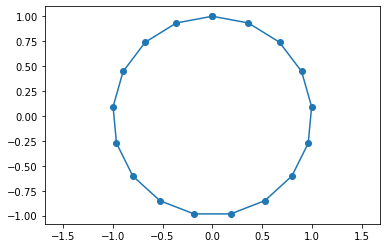

In [2]:
# Creating sample values for time

t = np.linspace(0, 2*np.pi, 18)

# Setting x equal to the cos(t) and y equal to sin(t)

x = np.cos(t)
y = np.sin(t)

fig = plt.figure(1)
plt.scatter(y, x),plt.axis('equal')
plt.plot(y, x)

plt.show()

We have a circle! This circle isn't smooth because we only used 18 points for our plot. This is the top-down view of the Sun showing a hypothetical sunspot moving with one full rotation of the Sun.

The code below plots the side view.

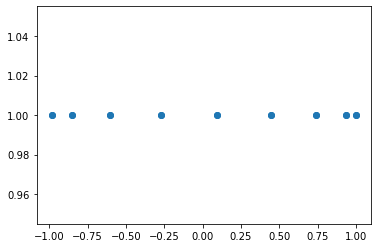

In [4]:
# Creates the side view

fig = plt.figure(2)
plt.scatter(x, np.ones(len(x)))

plt.show()

Here we see the path of the sunspot that you'd see on Earth. Towards the sides, the points seem to bunch up. The sunspot is still rotating on the Sun's surface the same amount but because of our perspective it looks like it hasn't moved much in the x direction.

In the imges in ***sunspots.ipynb*** and ***sunspotsAuto.ipynb***, the origin is not the center of the image but is rather the lower left corner. Let's shift our data to match this:

In [5]:
shiftx = []

# x starts at 1 and goes to -1, shiftx to start at 0 and go to 2

for i in x:
    if i < 0:
        shiftx.append(1+abs(i))
    else:
        shiftx.append(1-abs(i))

shiftx

[0.0,
 0.06752777059564419,
 0.2609910827793409,
 0.5542616442234617,
 0.907731640536698,
 1.2736629900720828,
 1.6026346363792563,
 1.8502171357296142,
 1.982973099683902,
 1.982973099683902,
 1.850217135729614,
 1.6026346363792565,
 1.273662990072083,
 0.9077316405366984,
 0.5542616442234615,
 0.2609910827793409,
 0.06752777059564419,
 0.0]

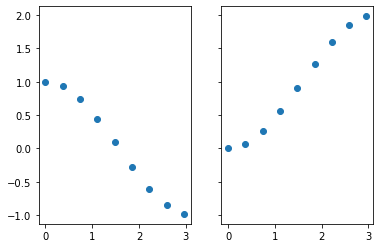

In [6]:
# Creates scatter plots of the x positions versus time and the shifted x positions versus time

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
half = int(np.floor(len(t)/2))
ax1.scatter(t[:half], x[:half])
ax2.scatter(t[:half], shiftx[:half])

plt.show()

On the left is before shifting the x values and the right is after shifting the x values to be positive and increasing like in our images. The time was cut in half so we don't see what happens on the side of the Sun facing away from us.

This fake sunspot's path looks a bit like an s shape. We can try fitting a curve to it using ```np.polyfit()```:

In [7]:
# Creates a linear fit for the sunspot's x position versus time

fit1 = np.polyfit(t[:half], shiftx[:half], 1)
fit1

array([ 0.75228571, -0.16773215])

The array gives us the slope and the intercept of the fit. If we include ```full=True``` it will also give us some information about the goodness of the fit:

In [8]:
# Linear fit with full equal to True

np.polyfit(t[:half],shiftx[:half], 1, full=True)

(array([ 0.75228571, -0.16773215]),
 array([0.08370929]),
 2,
 array([1.35652794, 0.39978988]),
 1.9984014443252818e-15)

The second array gives the residual from fitting a straight line. We can add this fit to our graph:

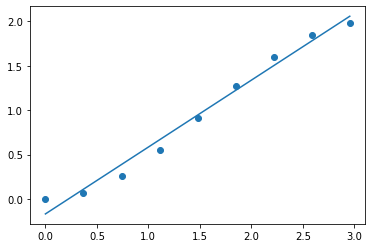

In [9]:
# Adds the linear fit to the scatter plot of the sunspot's x position versus time

fig = plt.figure(3)
ax = fig.add_subplot()
ax.scatter(t[:half], shiftx[:half])

# the first entry in fit1 is the slope, the second is the y intercept
# thus: shiftxTheory1 = mt + c

shiftxTheory1 = fit1[0]*t[:half] + fit1[1]

ax.plot(t[:half], shiftxTheory1)

plt.show()

The linear fit doesn't look the best. It turns out a third order fit is best:

(array([-0.14393338,  0.67647232, -0.0721269 ,  0.00293003]), array([8.13926168e-05]), 4, array([1.88564038, 0.64135483, 0.1797991 , 0.02639395]), 1.9984014443252818e-15)
Residual = 8.139261679526215e-05


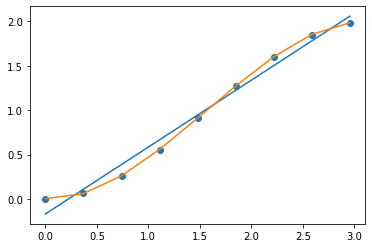

In [10]:
# Creates a third order fit

fit3 = np.polyfit(t[:half], shiftx[:half], 3, full=True)

print(fit3)
print('Residual = '+str(fit3[1][0]))

# Using the standard form of a cubic:
# y=ax^3 + bx^2 + cx + d, where a, b, c, and d are the coefficients obtained from the third order fit

shiftxTheory3 = fit3[0][0]*t[:half]**3 + fit3[0][1]*t[:half]**2 + fit3[0][2]*t[:half] + fit3[0][3]

ax.plot(t[:half], shiftxTheory3)
fig

A much better fit and smaller residual! In ```sunspotsAuto.ipynb``` a third degree polynomial fit is used to test whether to accept or reject a sunspot track.

The sunspot's 's' curve is actually just part of a sine wave and the path of the sunspot as we see it on the surface looks like an object in simple harmonic motion. Viewed top-down, the sunspot is traveling in uniform circular motion. This leads us to the equation used in ```sunspots.ipynb``` to calculate the period of rotation:

$$x = Asin\left(\frac{2\pi}{T}t+\phi\right)$$

where we tend to ignore $\phi$ because the slope of a graph of $arcsin(x/A)$ vs $t$ yields $2\pi/T$ which can be used to find the time period $T$:

$$T = \frac{2\pi}{m}$$

$\phi$ would be the y-intercept.